In [ ]:
'''
TODO:
+ implement path class
+ root node class
+ remove spaghetti
'''

In [1]:
from PDBReader import atom_positions_from_pdb
from test import *
from octree import *

In [54]:
atom_positions = atom_positions_from_pdb("2erk.pdb")

In [55]:
tree = Octree(atom_positions, 15).tree

In [ ]:
# ======= density estimation =======
# TODO: move functions into classes, cleanup, etc.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def lower_upper_bounds(cell, dim):  # Node: cell, int: dim
    c = cell.center[dim]
    d = cell.dimensions[dim]/2.0
    
    return c - d, c + d

In [9]:
def get_slice_of_leaves(leaf_collection, level, dim):
    sliced_tree = []

    for leaf in leaf_collection:
        low, high = lower_upper_bounds(leaf, dim)

        if level >= low and level <= high:
            sliced_tree.append(leaf)
            
    return sliced_tree

In [45]:
def density(pos, points):
    result = 0
    
    pos = np.array(pos)
    points = np.array(points)
    
    for i in range(len(points)):
        result += np.exp(-np.sum(((pos - points[i])**2)/6))
        
    return result

In [47]:
tree = Octree(generate_test_points(2, 5), 5, scale=2.01).tree

In [56]:
x_min, x_max = lower_upper_bounds(tree, 0)
y_min, y_max = lower_upper_bounds(tree, 1)

x = np.linspace(x_min + 0.001, x_max - 0.001, 50)
y = np.linspace(y_min + 0.001, y_max - 0.001, 50)

In [57]:
z_slice_ratio = 0.6  # between 0 and 1
low, high = lower_upper_bounds(tree, 2)


z_slice = z_slice_ratio * high + (1.0 - z_slice_ratio) * low

xy_sliced_tree = get_slice_of_leaves(tree.leaves, z_slice, 2)

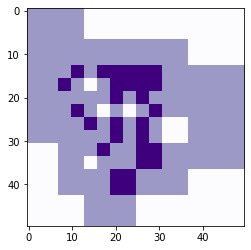

In [58]:
z = np.zeros((50,50))

for i in range(50):
    x_slice = x[i]
    
    for j in range(50):
        y_slice = y[j]
        
        x_sliced_tree = get_slice_of_leaves(xy_sliced_tree, y_slice, 1)
        
        sliced_tree = get_slice_of_leaves(x_sliced_tree, x_slice, 0)
        cell = sliced_tree[0]
        
        if cell.category == "boundary":
            z[i,j] = 0.5
        elif cell.category == "interior":
            z[i,j] = 1.0
            
plt.imshow(z, cmap="Purples")

In [59]:
for i in range(len(xy_sliced_tree)):  # near_points probably doesn't need to be cached
    leaf = xy_sliced_tree[i]
    
    leaf.near_points = leaf.points.copy()
    
    for ind in leaf.neighbor_indices:
        c = tree.leaves[ind].points.copy()
        leaf.near_points.extend(c)

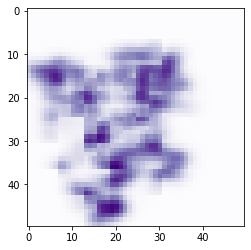

In [62]:
z = np.zeros((50,50))

for i in range(50):
    x_slice = x[i]
    
    for j in range(50):
        y_slice = y[j]
        
        x_sliced_tree = get_slice_of_leaves(xy_sliced_tree, y_slice, 1)
        
        sliced_tree = get_slice_of_leaves(x_sliced_tree, x_slice, 0)
        cell = sliced_tree[0]
        
        '''if cell.category == "boundary" or cell.category == "interior":
            z[i,j] = density([x_slice, y_slice, z_slice], cell.near_points)'''
        
        z[i,j] = density([x[i], y[j], z_slice], cell.near_points)
            
plt.imshow(z, cmap="Purples")